In [1]:
import re
import copy

RE_SPECIAL_CHARS = r"[^a-z0-9!@#\$%\^\&\*_\-,\.' ]"

RE_PATTERNS = {
    ' american ':
        [
            'amerikan'
        ],

    ' adolf ':
        [
            'adolf'
        ],


    ' hitler ':
        [
            'hitler'
        ],

    ' fuck':
        [
            '(f)(u|[^a-z0-9 ])(c|[^a-z0-9 ])(k|[^a-z0-9 ])([^ ])*',
            '(f)([^a-z]*)(u)([^a-z]*)(c)([^a-z]*)(k)',
            ' f[!@#\$%\^\&\*]*u[!@#\$%\^&\*]*k', 'f u u c',
            '(f)(c|[^a-z ])(u|[^a-z ])(k)', r'f\*',
            'feck ', ' fux ', 'f\*\*',
            'f\-ing', 'f\.u\.', 'f###', ' fu ', 'f@ck', 'f u c k', 'f uck', 'f ck'
        ],

    ' ass ':
        [
            '[^a-z]ass ', '[^a-z]azz ', 'arrse', ' arse ', '@\$\$'
                                                           '[^a-z]anus', ' a\*s\*s', '[^a-z]ass[^a-z ]',
            'a[@#\$%\^&\*][@#\$%\^&\*]', '[^a-z]anal ', 'a s s'
        ],

    ' ass hole ':
        [
            ' a[s|z]*wipe', 'a[s|z]*[w]*h[o|0]+[l]*e', '@\$\$hole'
        ],

    ' bitch ':
        [
            'b[w]*i[t]*ch', 'b!tch',
            'bi\+ch', 'b!\+ch', '(b)([^a-z]*)(i)([^a-z]*)(t)([^a-z]*)(c)([^a-z]*)(h)',
            'biatch', 'bi\*\*h', 'bytch', 'b i t c h'
        ],

    ' bastard ':
        [
            'ba[s|z]+t[e|a]+rd'
        ],

    ' trans gender':
        [
            'transgender'
        ],

    ' gay ':
        [
            'gay'
        ],

    ' cock ':
        [
            '[^a-z]cock', 'c0ck', '[^a-z]cok ', 'c0k', '[^a-z]cok[^aeiou]', ' cawk',
            '(c)([^a-z ])(o)([^a-z ]*)(c)([^a-z ]*)(k)', 'c o c k'
        ],

    ' dick ':
        [
            ' dick[^aeiou]', 'deek', 'd i c k'
        ],

    ' suck ':
        [
            'sucker', '(s)([^a-z ]*)(u)([^a-z ]*)(c)([^a-z ]*)(k)', 'sucks', '5uck', 's u c k'
        ],

    ' cunt ':
        [
            'cunt', 'c u n t'
        ],

    ' bull shit ':
        [
            'bullsh\*t', 'bull\$hit'
        ],

    ' homo sex ual':
        [
            'homosexual'
        ],

    ' jerk ':
        [
            'jerk'
        ],

    ' idiot ':
        [
            'i[d]+io[t]+', '(i)([^a-z ]*)(d)([^a-z ]*)(i)([^a-z ]*)(o)([^a-z ]*)(t)', 'idiots'
                                                                                      'i d i o t'
        ],

    ' dumb ':
        [
            '(d)([^a-z ]*)(u)([^a-z ]*)(m)([^a-z ]*)(b)'
        ],

    ' shit ':
        [
            'shitty', '(s)([^a-z ]*)(h)([^a-z ]*)(i)([^a-z ]*)(t)', 'shite', '\$hit', 's h i t'
        ],

    ' shit hole ':
        [
            'shythole'
        ],

    ' retard ':
        [
            'returd', 'retad', 'retard', 'wiktard', 'wikitud'
        ],

    ' rape ':
        [
            ' raped'
        ],

    ' dumb ass':
        [
            'dumbass', 'dubass'
        ],

    ' ass head':
        [
            'butthead'
        ],

    ' sex ':
        [
            'sexy', 's3x', 'sexuality'
        ],


    ' nigger ':
        [
            'nigger', 'ni[g]+a', ' nigr ', 'negrito', 'niguh', 'n3gr', 'n i g g e r'
        ],

    ' shut the fuck up':
        [
            'stfu'
        ],

    ' pussy ':
        [
            'pussy[^c]', 'pusy', 'pussi[^l]', 'pusses'
        ],

    ' faggot ':
        [
            'faggot', ' fa[g]+[s]*[^a-z ]', 'fagot', 'f a g g o t', 'faggit',
            '(f)([^a-z ]*)(a)([^a-z ]*)([g]+)([^a-z ]*)(o)([^a-z ]*)(t)', 'fau[g]+ot', 'fae[g]+ot',
        ],

    ' mother fucker':
        [
            ' motha ', ' motha f', ' mother f', 'motherucker',
        ],

    ' whore ':
        [
            'wh\*\*\*', 'w h o r e'
        ],
}


def preprocess(text=""):
    text = text.lower()
    # remove special characters
    text = re.sub(RE_SPECIAL_CHARS, ' ', text)
    # remove repetitive text in each word
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    text = pattern.sub(r"\1", text)

    for target, patterns in RE_PATTERNS.items():
        for pattern in patterns:
            text = re.sub(pattern, target, text)
    text = re.sub(r"[^a-z' ]", ' ', text)

    return text.split()


def preprocess_series(series):
    series = copy.deepcopy(series)
    series = series.str.lower()
    # remove special characters
    series = series.str.replace(RE_SPECIAL_CHARS, ' ')
    # remove repetitive text in each word
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    series = series.str.replace(pattern, r"\1", regex=True)

    for target, patterns in RE_PATTERNS.items():
        for pattern in patterns:
            series = series.str.replace(pattern, target)
    series = series.str.replace(r"[^a-z' ]", ' ')

    return series.str.split()

In [2]:
# Unzip file

import os
from zipfile import ZipFile 

SRC_BASE_PATH = "/kaggle/input/jigsaw-toxic-comment-classification-challenge/"
DEST_BASE_PATH = "/kaggle/working"

zips = os.listdir(SRC_BASE_PATH)

for zip in zips:
    with ZipFile(f"{SRC_BASE_PATH}{zip}", "r") as f:
        f.extractall(DEST_BASE_PATH)

In [3]:
# Load file
import pandas as pd

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [4]:
train['comment_text'] = preprocess_series(
    train['comment_text']).str.join(sep=" ")

test['comment_text'] = preprocess_series(
    test['comment_text']).str.join(sep=" ")

train.to_csv("./train-preprocess.csv")
test.to_csv("./test-preprocess.csv")

In [5]:
train = pd.read_csv("./train-preprocess.csv")
test = pd.read_csv("./test-preprocess.csv")

train["comment_text"] = train["comment_text"].fillna("no comment")
test["comment_text"] = test["comment_text"].fillna("no comment")

X_train = train['comment_text'].str.lower()
X_test = test['comment_text'].str.lower()

y_train = train[["toxic", "severe_toxic", "obscene",
                 "threat", "insult", "identity_hate"]].values

In [6]:
train.groupby(["toxic", "severe_toxic", "obscene",
                 "threat", "insult", "identity_hate"])\
                .size()\
                .sort_values(ascending=False)\
                .reset_index()\
                .rename(columns={0: 'count'})

,toxic,severe_toxic,obscene,threat,insult,identity_hate,count
0,0,0,0,0,0,0,143346
1,1,0,0,0,0,0,5666
2,1,0,1,0,1,0,3800
3,1,0,1,0,0,0,1758
4,1,0,0,0,1,0,1215
5,1,1,1,0,1,0,989
6,1,0,1,0,1,1,618
7,0,0,1,0,0,0,317
8,0,0,0,0,1,0,301
9,1,1,1,0,1,1,265


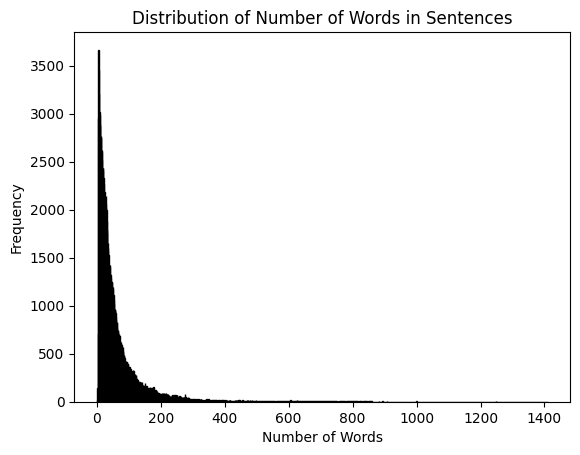

In [7]:
from matplotlib import pyplot as plt

word_counts = [len(sentence.split()) for sentence in X_train]

plt.hist(word_counts, bins=max(word_counts)-min(word_counts)+1, align='left', edgecolor='black')

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words in Sentences')

plt.show()

In [28]:
import tensorflow

print(tensorflow.__version__)

2.15.0


In [9]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, GlobalMaxPool1D, GlobalAveragePooling1D, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2024-04-20 15:01:46.813829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 15:01:46.813944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 15:01:46.970537: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
MAX_FEATURES = 25000
MAX_LEN = 150
EMBEDDING_SIZE = 300

In [10]:
tokenizer = Tokenizer(num_words=MAX_FEATURES,lower= True)
tokenizer.fit_on_texts(list(X_train)+list(X_test))
tokenized_train = tokenizer.texts_to_sequences(X_train)
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_train_final = pad_sequences(tokenized_train, maxlen=MAX_LEN)
X_test_final = pad_sequences(tokenized_test, maxlen=MAX_LEN)

In [14]:
import io
import json

tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [17]:
import numpy as np

EMBEDDING_FILE = '/kaggle/input/glove840b300dtxt/glove.840B.300d.txt'

embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
        
word_index = tokenizer.word_index
num_words = min(MAX_FEATURES, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_SIZE))
for word, i in word_index.items():
    if i >= MAX_FEATURES:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [18]:
import numpy as np

np.save('embedding_matrix.npy', embedding_matrix)

In [19]:
model = Sequential()
model.add(Embedding(MAX_FEATURES, EMBEDDING_SIZE, name="embedding", input_shape=(MAX_LEN, ), trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalAveragePooling1D())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(6, activation='sigmoid'))

model.get_layer("embedding").set_weights([embedding_matrix])

model.compile(loss='binary_crossentropy', optimizer=Adam(
    learning_rate=1e-3), metrics=['accuracy'])

print(model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 150, 300)       │     7,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 150, 128)       │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,691,638 (29.34 MB)

 Trainable params: 191,638 (748.59 KB)

 Non-trainable params: 7,500,000 (28.61 MB)

None


In [20]:
callbacks_list = [
    EarlyStopping(monitor='accuracy', patience=2),
    ModelCheckpoint(filepath='model.weights.h5', monitor='val_loss', save_weights_only=True)
]

history = model.fit(X_train_final, y_train, epochs=5, batch_size=64, validation_split=0.1, callbacks=callbacks_list, verbose=1)

Epoch 1/5
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.7575 - loss: 0.1374 - val_accuracy: 0.9940 - val_loss: 0.0533
Epoch 2/5
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.9877 - loss: 0.0537 - val_accuracy: 0.9940 - val_loss: 0.0507
Epoch 3/5
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.9888 - loss: 0.0500 - val_accuracy: 0.9940 - val_loss: 0.0483
Epoch 4/5
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.9894 - loss: 0.0470 - val_accuracy: 0.9940 - val_loss: 0.0466
Epoch 5/5
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.9863 - loss: 0.0453 - val_accuracy: 0.9940 - val_loss: 0.0468


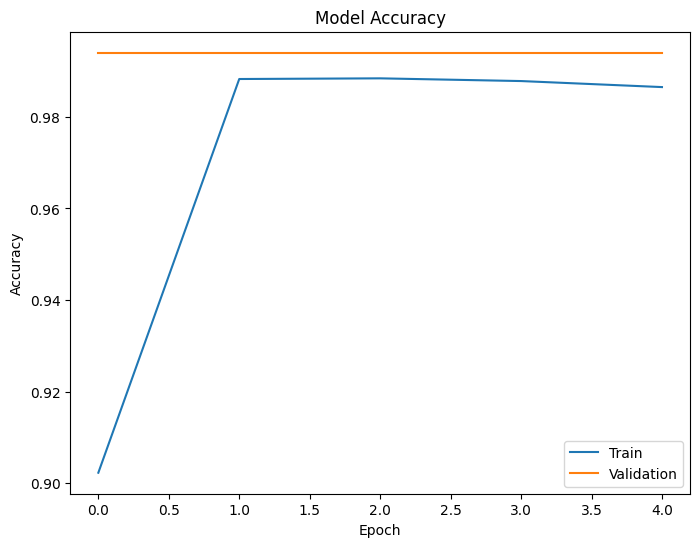

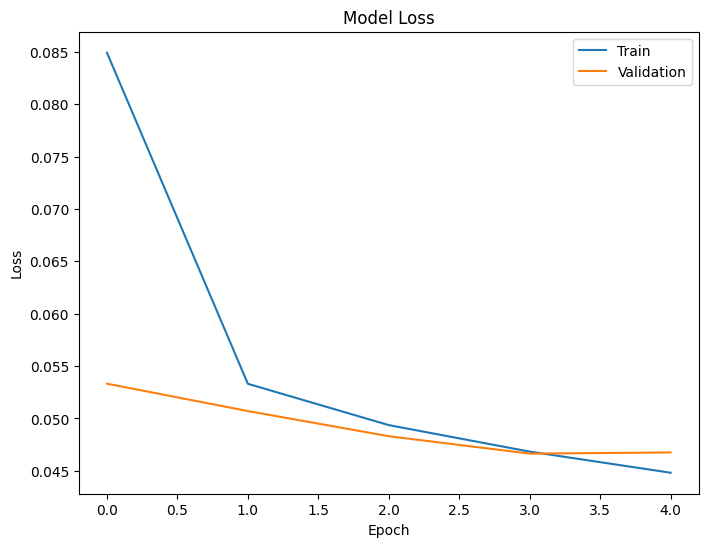

In [21]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [22]:
model.save_weights("./model.weights.h5")

In [25]:
model2 = Sequential()
model2.add(Embedding(MAX_FEATURES, EMBEDDING_SIZE, name="embedding", input_shape=(MAX_LEN, ), trainable=False))
model2.add(Bidirectional(LSTM(64, return_sequences=True)))
model2.add(GlobalAveragePooling1D())
model2.add(Dense(32, activation = "relu"))
model2.add(Dropout(0.1))
model2.add(Dense(16, activation = "relu"))
model2.add(Dropout(0.1))
model2.add(Dense(6, activation='sigmoid'))

model2.get_layer("embedding").set_weights([embedding_matrix])

model2.compile(loss='binary_crossentropy', optimizer=Adam(
    learning_rate=1e-3), metrics=['accuracy'])

model2.load_weights("./model.weights.h5")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [27]:
y_pred = model2.predict(X_test_final, batch_size=64, verbose=1)

2394/2394 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


In [43]:
submission = pd.read_csv('sample_submission.csv')
submission[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]] = y_pred
submission.to_csv('submission.csv', index=False)